In [128]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,  models, datasets
from tensorflow.keras.layers import Conv2D, LeakyReLU

Loading the Dataset

In [129]:
(train_data, train_labels), (test_data, test_labels) = datasets.mnist.load_data()


Concatanating the Dataset

In [130]:
concatenated_data = np.concatenate((train_data, test_data), axis=0)
concatenated_labels = np.concatenate((train_labels, test_labels), axis=0)

#Normalization
concatenated_data = concatenated_data / 255.0

Split the dataset

In [131]:
# Split the combined dataset into train, validation, and test sets
data_train, data_temp, labels_train, labels_temp = train_test_split(concatenated_data, concatenated_labels, test_size=0.4, random_state=42) #Split the training set
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42) #Split the validations and test set

Reshape Data

In [132]:
data_train = data_train.reshape(-1, 28, 28, 1)
data_val = data_val.reshape(-1, 28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

Data Augmentation Model

In [105]:
#Data Augmentation
#data_augmentation = tf.keras.Sequential([
    #tf.keras.layers.RandomFlip("horizontal",input_shape=(28,28,1)),
    #tf.keras.layers.RandomRotation(0.1),
    #tf.keras.layers.RandomZoom(0.1)
#])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Building the model

In [133]:
model = tf.keras.models.Sequential()

#model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation=LeakyReLU(alpha=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=LeakyReLU(alpha=0.001)))

model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 3, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,714 (96.54 KB)

 Trainable params: 24,522 (95.79 KB)

 Non-trainable params: 192 (768.00 B)

In [135]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [136]:
history = model.fit(data_train, labels_train, epochs=20, validation_data=(data_val, labels_val))

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5151 - loss: 1.4864 - val_accuracy: 0.9256 - val_loss: 0.2652
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9097 - loss: 0.3092 - val_accuracy: 0.9544 - val_loss: 0.1460
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9433 - loss: 0.1946 - val_accuracy: 0.9660 - val_loss: 0.1132
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9590 - loss: 0.1414 - val_accuracy: 0.9719 - val_loss: 0.0954
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9645 - loss: 0.1160 - val_accuracy: 0.9737 - val_loss: 0.0862
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9707 - loss: 0.0965 - val_accuracy: 0.9759 - val_loss: 0.0777
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9748 - loss: 0.0843 - val_accuracy: 0.9774 - val_loss: 0.0739
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9767 - loss: 0.0772 

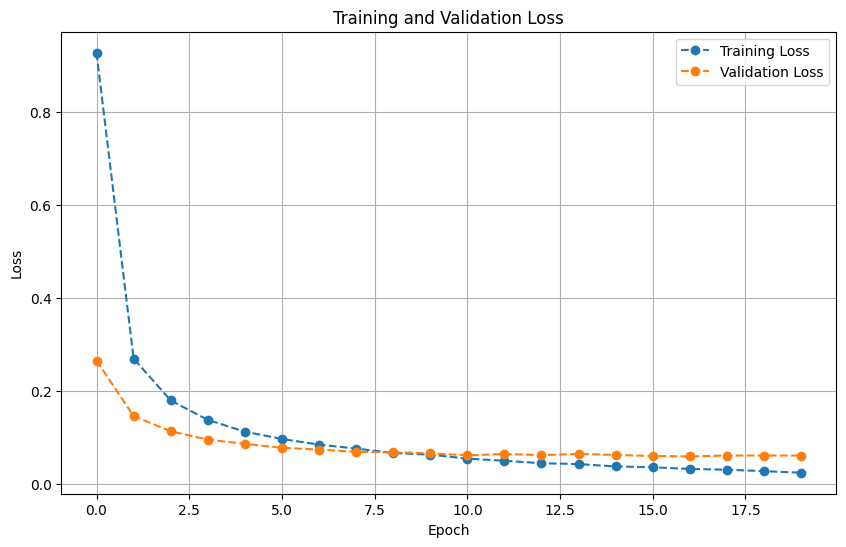

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1419
           1       0.99      0.99      0.99      1607
           2       0.98      0.97      0.97      1403
           3       0.98      0.98      0.98      1437
           4       0.98      0.98      0.98      1326
           5       0.97      0.98      0.98      1249
           6       0.99      0.99      0.99      1351
           7       0.97      0.99      0.98      1488
           8       0.98      0.98      0.98      1319
           9       0.98      0.97      0.98      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



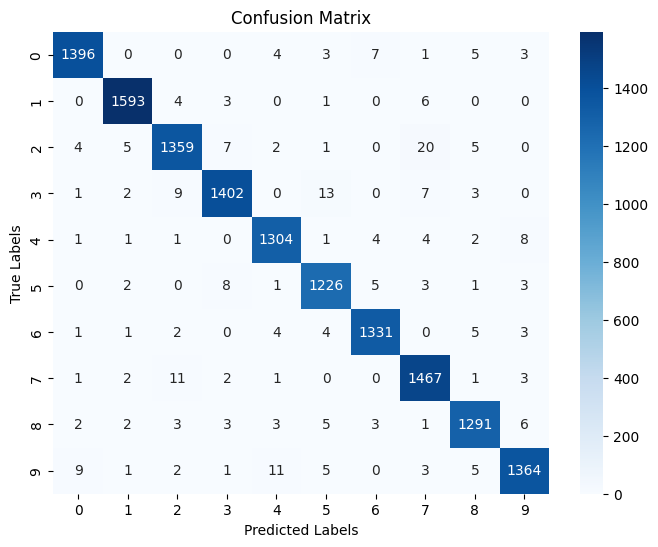

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
pred = model.predict(data_test)

pred_classes = np.argmax(pred, axis=1)

print(classification_report(labels_test, pred_classes, digits=2))
conf_matrix = confusion_matrix(labels_test, pred_classes)

class_labels = [str(i) for i in range(10)]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
